In [14]:

from fastai import *
from fastai.vision import *
 
path = Path(r'C:\Users\lonng\Desktop\fastai v3\ziti')
def getImg(folder, file):
    '''
        class_:图像类名
        folder:图像所在的文件夹
        file:图像图片的url文件
        下载图像
    '''
    
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=100)
    verify_images(path/folder, max_workers=8)
 
folders = ['heiti', 'kaiti', 'songti']
files =['heiti.csv', 'kaiti.csv', 'songti.csv']
 
for folder, file in zip(folders, files):
    getImg(folder, file)
 
data = ImageDataBunch.from_folder(path, path, valid_pct=0.2,
        ds_tfms=get_transforms(), size=4, num_workers=4).normalize(imagenet_stats)
data.show_batch(3)



D:\acaconda\lib\site-packages\fastai\basic_data.py:245: UserWarning: Your training dataloader is empty, you have only 12 items in your training set.
                 Your batch size is 64, you should lower it.
  Your batch size is {self.train_dl.batch_size}, you should lower it.""")


You can deactivate this warning by passing `no_check=True`.


StopIteration: 

In [13]:
?ImageDataBunch.from_folder

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
path=Path(r"C:\Users\lonng\Desktop\fastai v3")

In [3]:
path.ls()
path

WindowsPath('C:/Users/lonng/Desktop/fastai v3')

In [4]:
path_img = path/"ziti"

In [5]:
fnames = get_image_files(path_img)
fnames[:5]

[WindowsPath('C:/Users/lonng/Desktop/fastai v3/ziti/heiti-1.jpg'),
 WindowsPath('C:/Users/lonng/Desktop/fastai v3/ziti/heiti-2.jpg'),
 WindowsPath('C:/Users/lonng/Desktop/fastai v3/ziti/heiti-3.jpg'),
 WindowsPath('C:/Users/lonng/Desktop/fastai v3/ziti/heiti-4.jpg'),
 WindowsPath('C:/Users/lonng/Desktop/fastai v3/ziti/heiti-5.jpg')]

In [6]:
pat = r'ziti/(.*?)-\d+.jpg$'

In [7]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=14, bs=6, num_workers=0
                                  ).normalize(imagenet_stats)

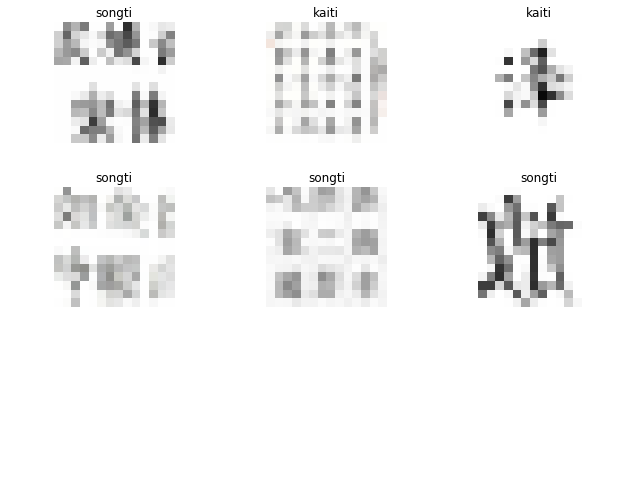

In [34]:
data.show_batch(rows=3, figsize=(9,7))

In [9]:
print(data.classes)

['heiti', 'kaiti', 'songti']


In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [35]:
defaults.device=torch.device('cuda')
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.831681,6.692591,0.333333,00:00
1,1.109913,1.542742,0.666667,00:00
2,0.966394,2.002716,0.333333,00:00
3,0.953143,9.849953,0.333333,00:00
4,0.790568,2.861215,0.333333,00:00


In [13]:
learn.save("modle1")

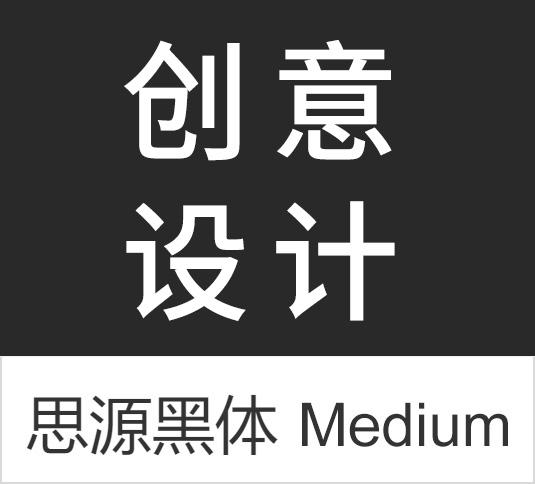

In [41]:
img_test=open_image(r"C:/Users/lonng/Desktop/fastai v3/ziti/heiti-2.jpg")
img_test

In [42]:
aa,bb,cc=learn.predict(img_test)
aa,bb,cc

(Category heiti, tensor(0), tensor([0.8662, 0.0060, 0.1277]))

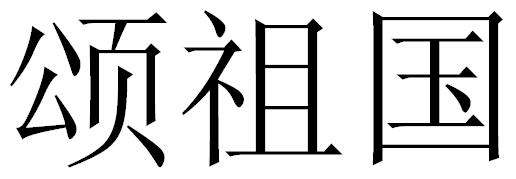

In [39]:
img_test2=open_image(r"C:/Users/lonng/Desktop/test222.jpg")
img_test2

In [40]:
mm,bb,cc=learn.predict(img_test2)
mm,bb,cc

(Category heiti, tensor(0), tensor([0.7431, 0.0759, 0.1810]))

In [43]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


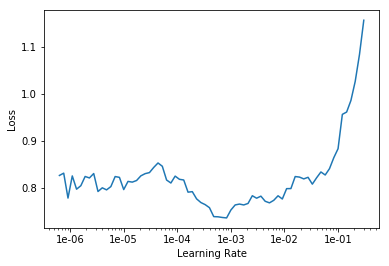

In [44]:
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(5,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.681554,5.687102,0.333333,00:00
1,1.014540,11.241275,0.333333,00:00
2,0.949554,15.447658,0.333333,00:00
3,0.889175,21.837128,0.333333,00:00
4,0.945270,12.018379,0.333333,00:00


In [49]:
learn.fit_one_cycle(5,1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.746173,0.423637,0.333333,00:00
1,0.985514,1.530659,0.333333,00:00
2,1.217014,10.944793,0.333333,00:00
3,1.145227,6.744493,0.333333,00:00
4,1.055971,15.923916,0.333333,00:00


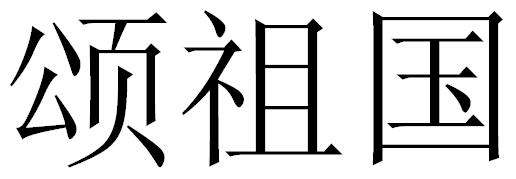

In [47]:
img_test2=open_image(r"C:/Users/lonng/Desktop/test222.jpg")
img_test2

In [48]:
mm,bb,cc=learn.predict(img_test2)
mm,bb,cc

(Category heiti, tensor(0), tensor([0.5750, 0.1137, 0.3113]))

In [29]:
import torch

In [30]:
torch.cuda.is_available()

True

In [31]:
torch.backends.cudnn.enabled

True